In [1]:
import time
from tabulate import tabulate

def time_it(func):
    def wrapper(*args, **kwargs):
        start = time.perf_counter_ns()
        result = func(*args, **kwargs)
        end = time.perf_counter_ns()
        return (end - start), result
    return wrapper

In [2]:
import matplotlib.pyplot as plt

def plot(func):
    values = []
    real = []
    for i in range(1, 31):
        values.append(func(i)[0])
        real.append(func(i)[1])
    
    fig, ax = plt.subplots(figsize =(10, 6))
    
    plt.plot([i for i in range(1, 31)], values)
    plt.scatter([i for i in range(1, 31)], values, color='red')
    plt.xlabel('fibonacci number')
    plt.ylabel('time(ns)')
    
    data = []
    i = 0
    for value in values:
        data.append([i, value, real[i]])
        i += 1
    # print(tabulate(data, headers=["number", "time(ns)", "value"], tablefmt='fancy_grid', numalign="center"))
    plt.show()
    
def plot_m(funcs):
    for func in funcs:
        values = []
        for i in range(1, 31):
            values.append(func[0](i))
        
        plt.plot([i for i in range(1, 31)], values, label=func[1])
    plt.legend()
    plt.show()

In [3]:
@time_it
def fibonacci_iterative(n):
    first = 0
    second = 1
    for i in range(n - 2):
        temp =  first + second
        first = second
        second = temp
    return second

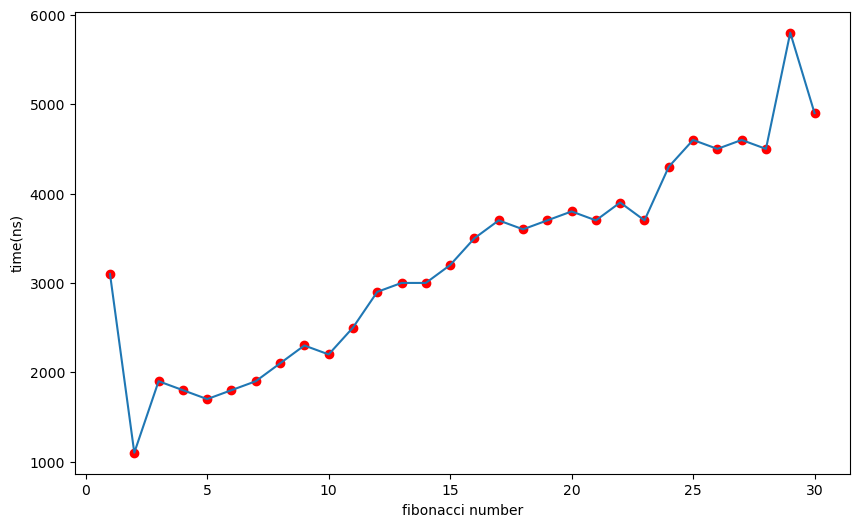

In [4]:
plot(fibonacci_iterative)

In [5]:
@time_it
def fibonacci_recursive(n):
    if n == 1:
        return 1
    if n == 0:
        return 0
    return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)

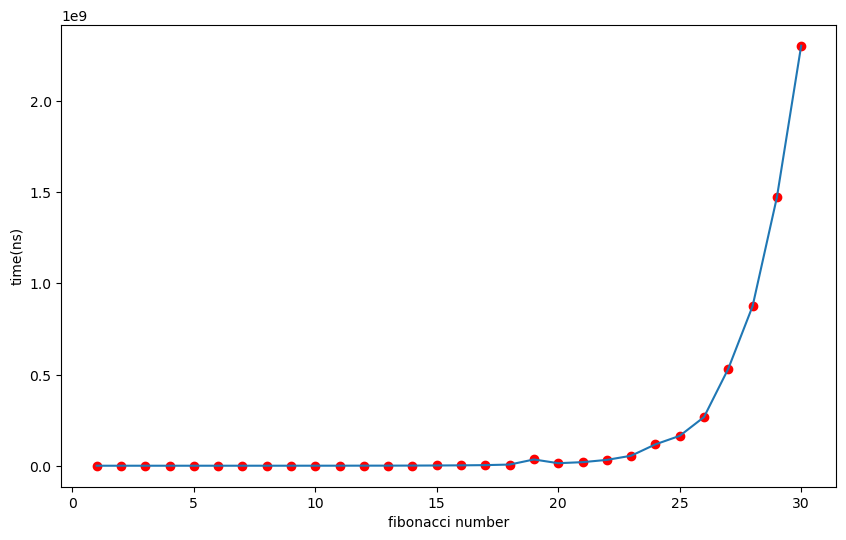

In [6]:
plot(fibonacci_recursive)

In [7]:
from math import sqrt

@time_it
def fibonacci_binet(n):
    phi = (1 + sqrt(5)) / 2
    return int((phi ** n - (1 - phi) ** n) / sqrt(5))

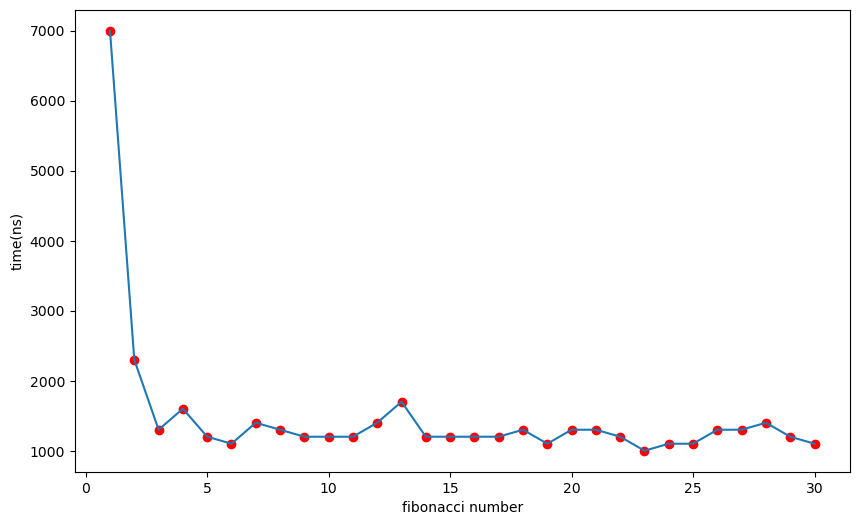

In [8]:
plot(fibonacci_binet)

In [11]:
@time_it
def fibonacci_memoized(n, memo={}):
    if n in memo:
        return memo[n]
    if n <= 1:
        return n
    memo[n] = fibonacci_memoized(n-1) + fibonacci_memoized(n-2)
    return memo[n]

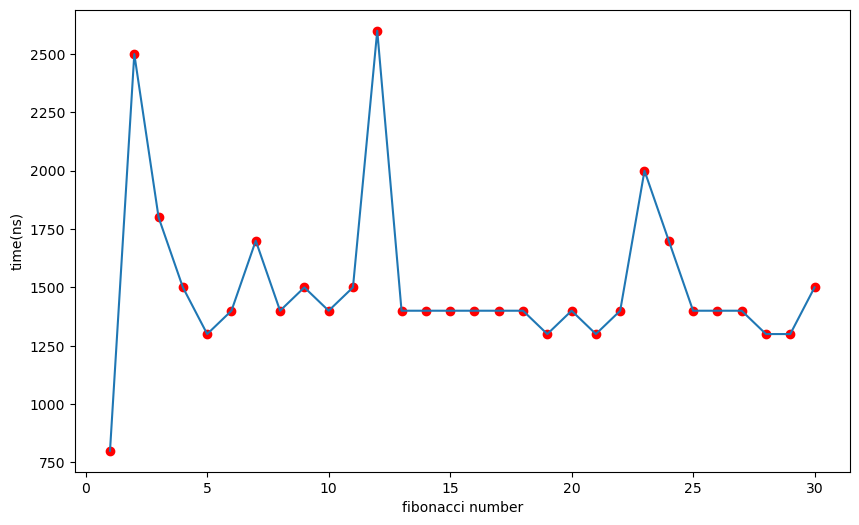

In [12]:
plot(fibonacci_memoized)

In [14]:
@time_it
def fibonacci_matrix(n):
    if n <= 1:
        return n
    def matrix_mult(A, B):
        C = [[0, 0], [0, 0]]
        for i in range(2):
            for j in range(2):
                for k in range(2):
                    C[i][j] += A[i][k] * B[k][j]
        return C
    def matrix_pow(A, n):
        if n <= 1:
            return A
        B = matrix_pow(A, n//2)
        B = matrix_mult(B, B)
        if n % 2:
            B = matrix_mult(A, B)
        return B
    F = [[1, 1], [1, 0]]
    F = matrix_pow(F, n-1)
    return F[0][0]

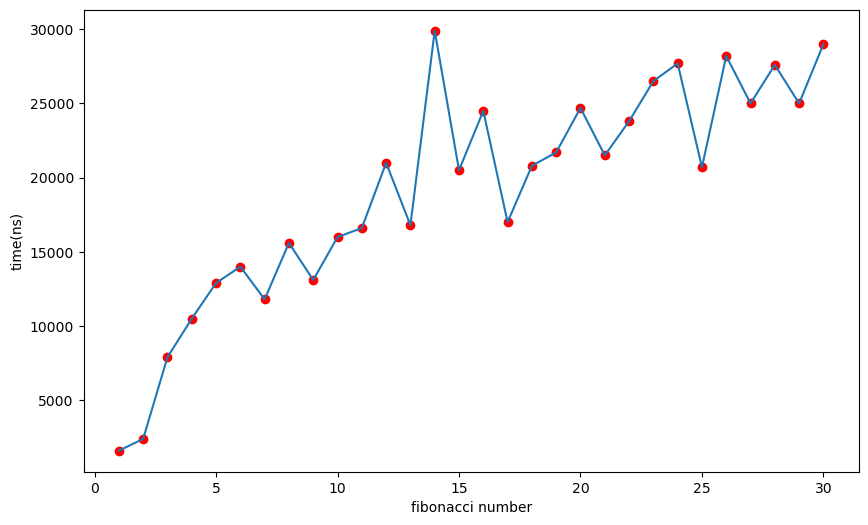

In [15]:
plot(fibonacci_matrix)

In [16]:
@time_it
def fibonacci_tco(n, a=0, b=1):
    if n == 0:
        return a
    if n == 1:
        return b
    return fibonacci_tco(n-1, b, a + b)


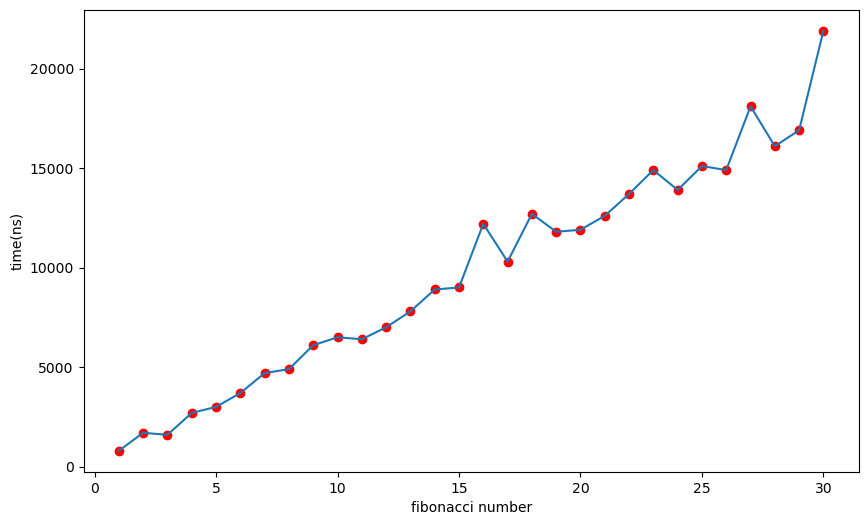

In [17]:
plot(fibonacci_tco)

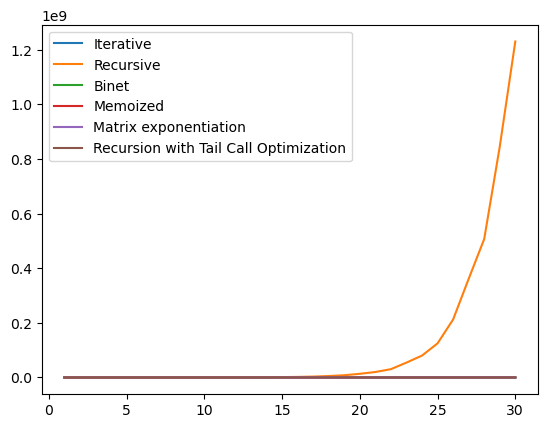

In [15]:
plot_m([(fibonacci_iterative, 'Iterative'), (fibonacci_recursive, "Recursive"), (fibonacci_binet, "Binet"), 
        (fibonacci_memoized, "Memoized"), (fibonacci_matrix, "Matrix exponentiation"), (fibonacci_tco, "Recursion with Tail Call Optimization")]) 

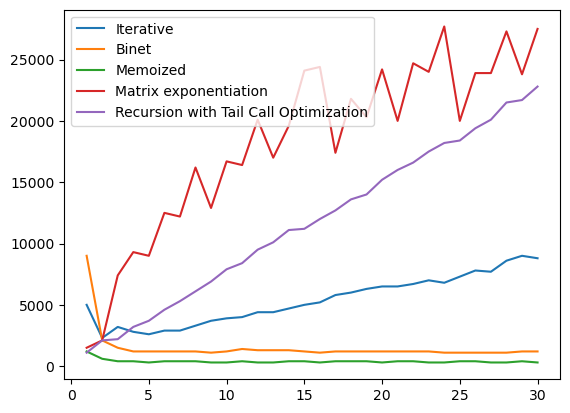

In [16]:
plot_m([(fibonacci_iterative, 'Iterative'), (fibonacci_binet, "Binet"), 
        (fibonacci_memoized, "Memoized"), (fibonacci_matrix, "Matrix exponentiation"), (fibonacci_tco, "Recursion with Tail Call Optimization")]) 